In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [15]:
df = pd.read_csv('output/Inflation_Rate_Variables_Dataset.csv')
# Show the first few rows to verify the changes
df.head()

,Unnamed: 0,SP30577_Índice Nacional de Precios al consumidor Variacion mensual,SF29652_Base Monetaria,"SF31991_Banco de Mexico, Recursos en moneda extranjera, Reserva Internacional (Definida de acuerdo con la Ley del Banco de Mexico de Abril de 1994)","SF283_TIIE a 28 dias Tasa de interes promedio mensual, en por ciento anual","SG41_Ingresos y Gastos Presupuestales del Sector Publico Medicion por Ingreso-Gasto, Flujos de Caja Balance publico Balance presupuestario"
0,1995-12-01,3.26,66808.6,15741019.0,51.36,-3174.4
1,1996-01-01,3.59,57939.4,15483686.0,42.66,6627.0
2,1996-02-01,2.33,57822.5,15780326.0,40.11,6018.0
3,1996-03-01,2.20,59499.4,15490979.0,42.93,2071.0
4,1996-04-01,2.84,57172.2,15642131.0,36.61,13894.9



=== Basic Statistics ===

Dataset Shape: (348, 6)

Missing Values:
CPI_Monthly_Variation     0
Monetary_Base             0
International_Reserves    0
Interest_Rate             0
Budget_Balance            0
Date                      0
dtype: int64

Descriptive Statistics:
       CPI_Monthly_Variation  Monetary_Base  International_Reserves  \
count             348.000000   3.480000e+02            3.480000e+02   
mean                0.531868   9.027502e+05            1.146818e+08   
min                -1.010000   5.717220e+04            1.540224e+07   
25%                 0.230000   2.411070e+05            5.119402e+07   
50%                 0.480000   5.896465e+05            9.969311e+07   
75%                 0.702500   1.379885e+06            1.781935e+08   
max                 3.590000   3.153820e+06            2.316224e+08   
std                 0.572148   8.369684e+05            6.855681e+07   

       Interest_Rate  Budget_Balance                           Date  
count     348.00

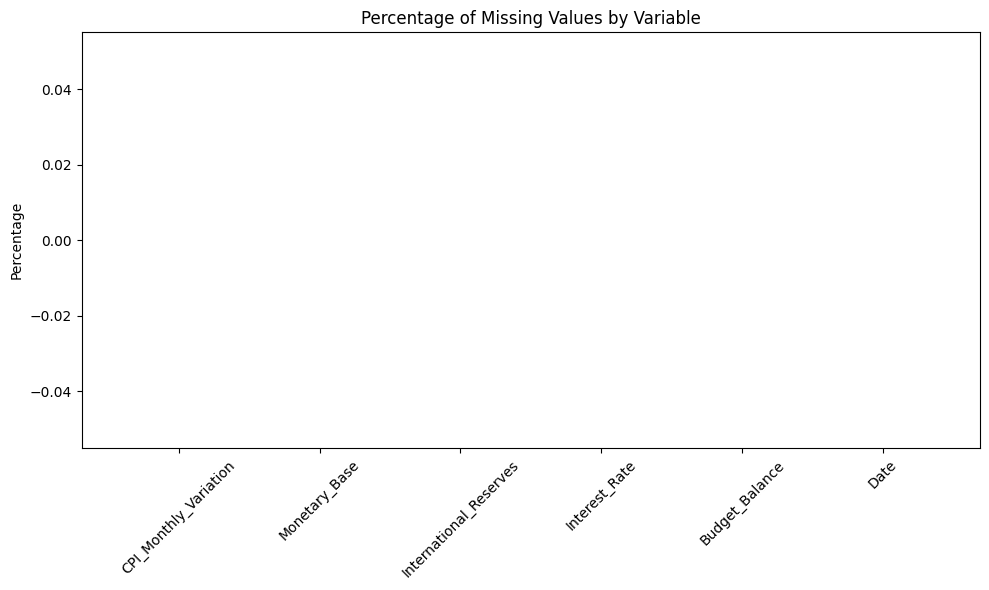


=== Outlier Analysis ===

CPI_Monthly_Variation:
Number of outliers: 26
Sample outliers:
0    3.26
1    3.59
2    2.33
3    2.20
4    2.84
Name: CPI_Monthly_Variation, dtype: float64

Monetary_Base:
Number of outliers: 1
Sample outliers:
347    3153819.6
Name: Monetary_Base, dtype: float64

International_Reserves:
Number of outliers: 0

Interest_Rate:
Number of outliers: 44
Sample outliers:
0    51.36
1    42.66
2    40.11
3    42.93
4    36.61
Name: Interest_Rate, dtype: float64

Budget_Balance:
Number of outliers: 22
Sample outliers:
228   -544989.1
238   -519071.6
239   -518370.8
240   -625886.4
252   -502224.2
Name: Budget_Balance, dtype: float64


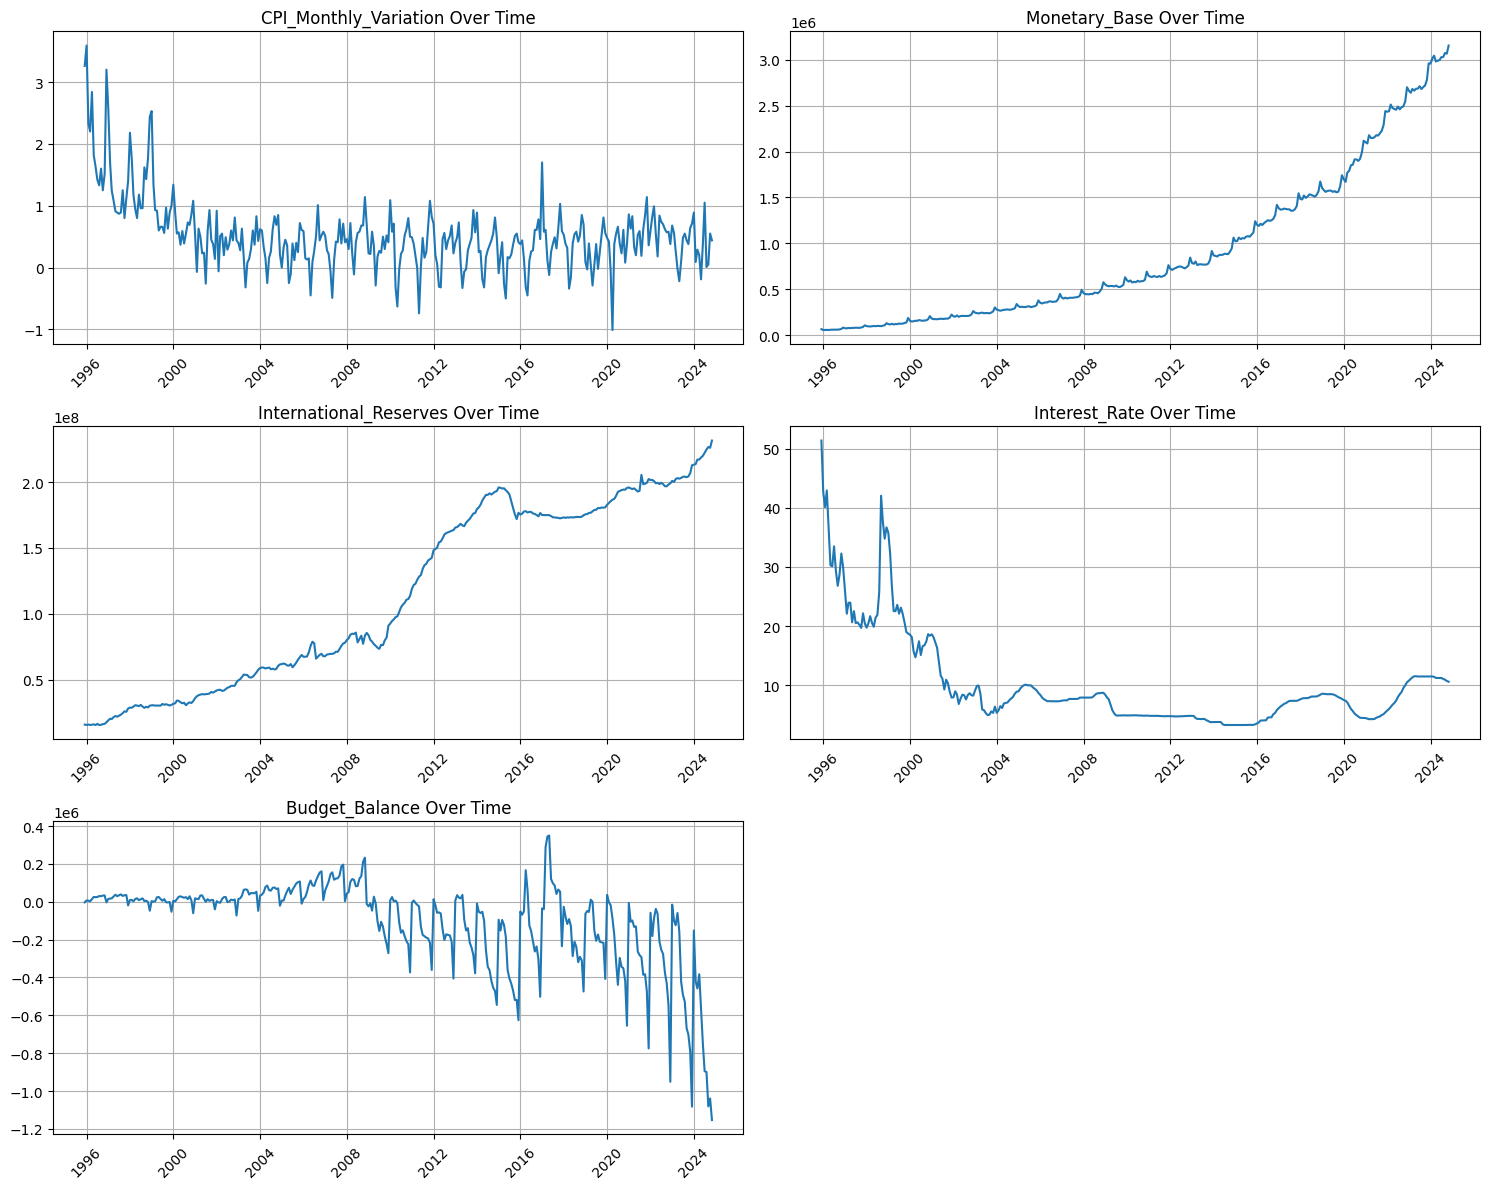

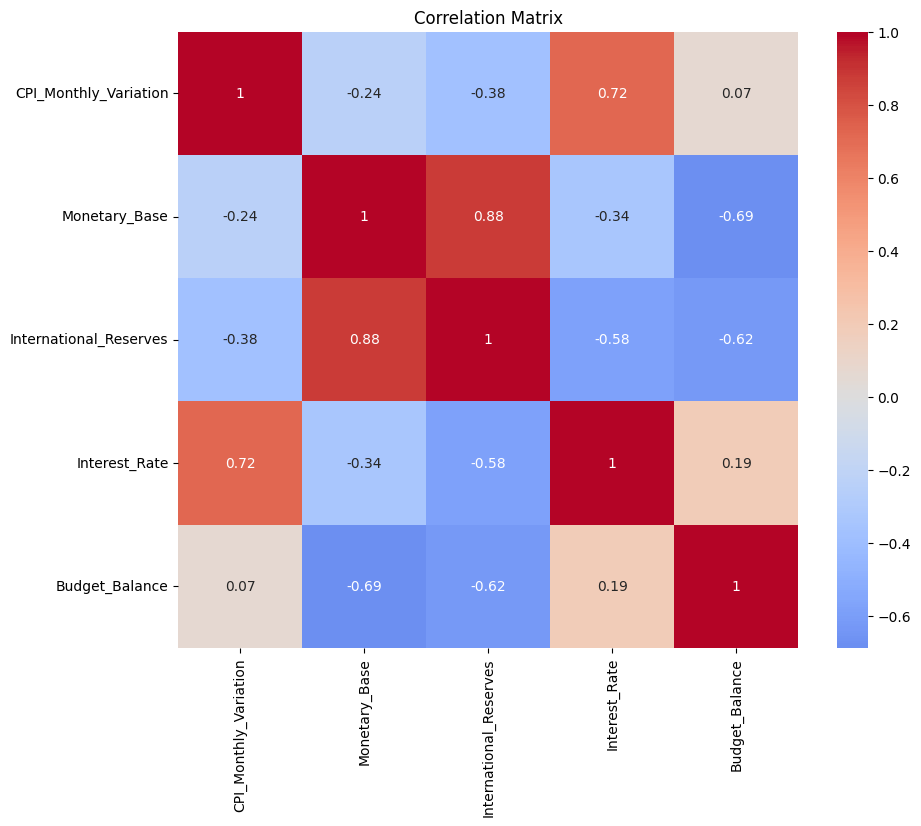

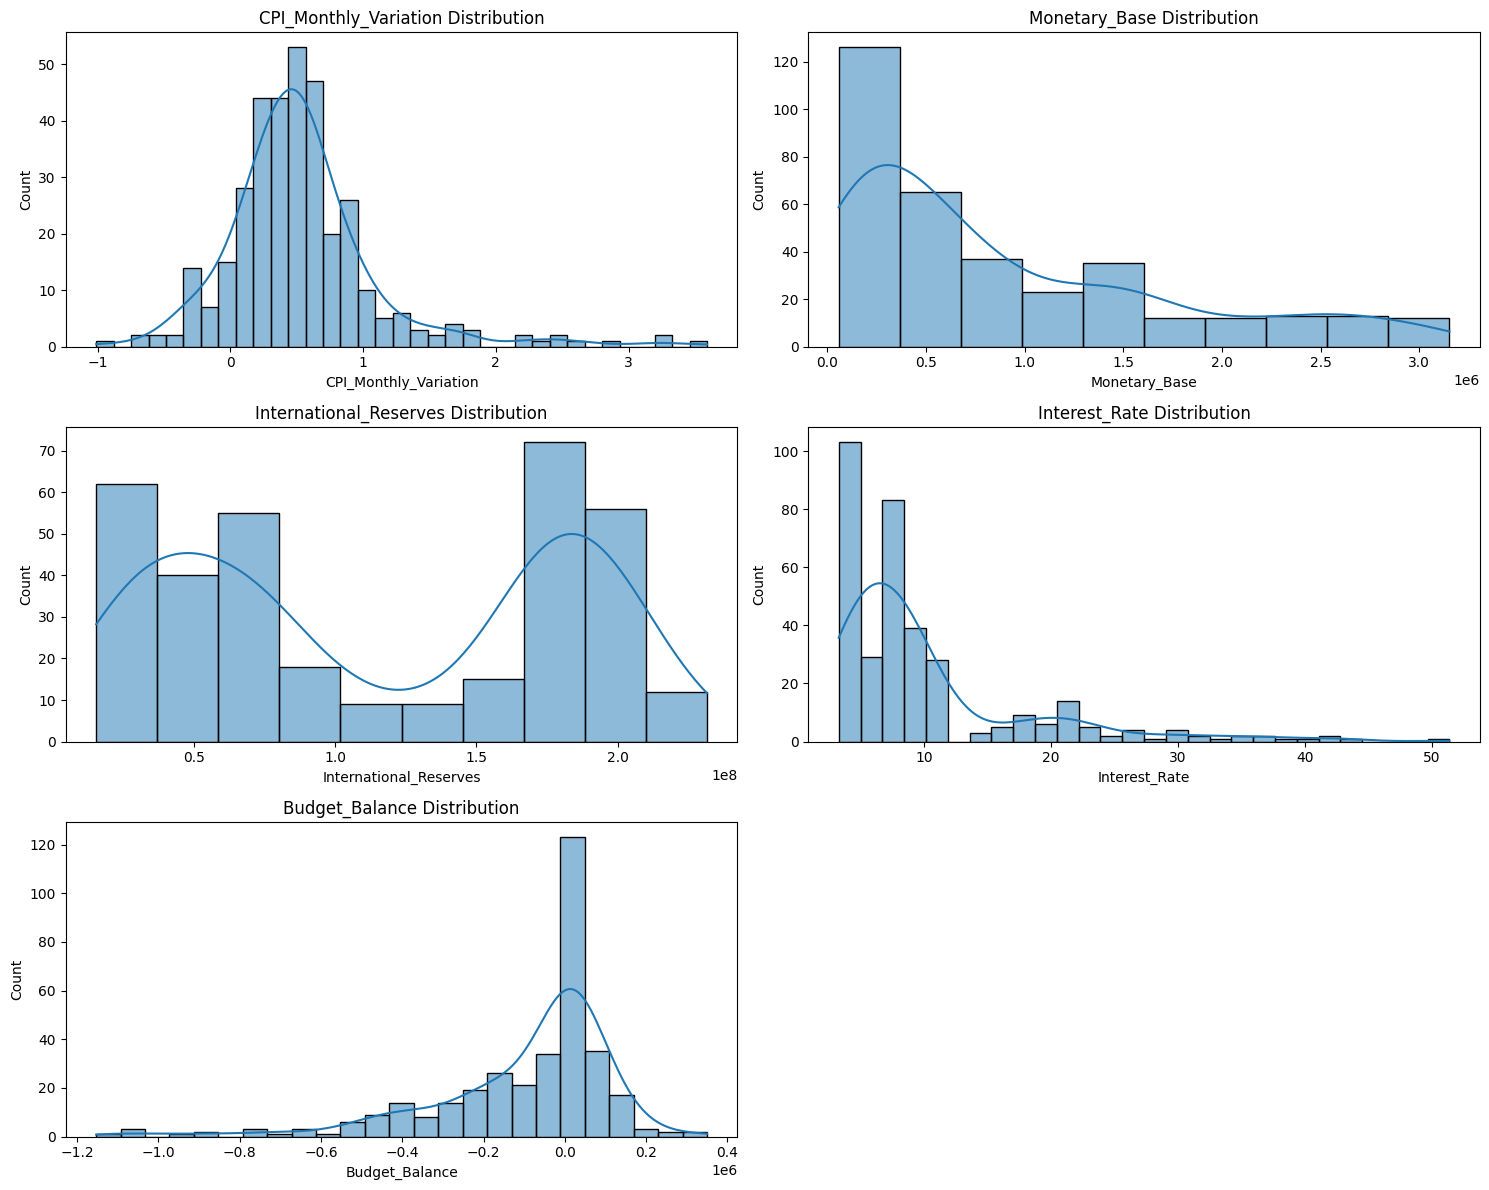

In [16]:
# Read the dataset
df = pd.read_csv('output/Inflation_Rate_Variables_Dataset.csv')

# Basic data preparation
def prepare_data(df):
    # Convert the first column to datetime
    df['Date'] = pd.to_datetime(df.iloc[:, 0])
    df = df.drop(df.columns[0], axis=1)
    
    column_names = {
        '': 'Date',
        'SF31991_Banco de Mexico, Recursos en moneda extranjera, Reserva Internacional (Definida de acuerdo con la Ley del Banco de Mexico de Abril de 1994)': 'International_Reserves',
        'SP30577_Índice Nacional de Precios al consumidor Variacion mensual': 'CPI_Monthly_Variation',
        'SG41_Ingresos y Gastos Presupuestales del Sector Publico Medicion por Ingreso-Gasto, Flujos de Caja Balance publico Balance presupuestario': 'Budget_Balance',
        'SF29652_Base Monetaria': 'Monetary_Base',
        'SF283_TIIE a 28 dias Tasa de interes promedio mensual, en por ciento anual': 'Interest_Rate'
    }

    df = df.rename(columns=column_names)
    
    return df

# Function for basic statistics
def get_basic_stats(df):
    print("\n=== Basic Statistics ===")
    print("\nDataset Shape:", df.shape)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDescriptive Statistics:")
    print(df.describe())

# Function for time series analysis
def plot_time_series(df):
    plt.figure(figsize=(15, 12))
    for i, column in enumerate(df.columns[:-1], 1):  # Excluding Date
        plt.subplot(3, 2, i)
        plt.plot(df['Date'], df[column])
        plt.title(f'{column} Over Time')
        plt.xticks(rotation=45)
        plt.grid(True)
    plt.tight_layout()
    plt.show()

# Function for correlation analysis
def plot_correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

# Function for distribution analysis
def plot_distributions(df):
    plt.figure(figsize=(15, 12))
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for i, column in enumerate(numeric_cols, 1):
        plt.subplot(3, 2, i)
        sns.histplot(df[column].dropna(), kde=True)
        plt.title(f'{column} Distribution')
    plt.tight_layout()
    plt.show()

# Function to check for outliers
def analyze_outliers(df):
    print("\n=== Outlier Analysis ===")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | 
                     (df[column] > (Q3 + 1.5 * IQR))][column]
        print(f"\n{column}:")
        print(f"Number of outliers: {len(outliers)}")
        if len(outliers) > 0:
            print("Sample outliers:")
            print(outliers.head())

# Function to analyze missing values
def analyze_missing_values(df):
    print("\n=== Missing Values Analysis ===")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing,
        'Percentage': missing_pct
    })
    print(missing_df)
    
    # Plot missing values
    plt.figure(figsize=(10, 6))
    plt.bar(missing_df.index, missing_df['Percentage'])
    plt.title('Percentage of Missing Values by Variable')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage')
    plt.tight_layout()
    plt.show()

# Main analysis execution
def main():
    # Read and prepare data
    df = pd.read_csv('output/Inflation_Rate_Variables_Dataset.csv')
    df = prepare_data(df)
    
    # Perform analysis
    get_basic_stats(df)
    analyze_missing_values(df)
    analyze_outliers(df)
    
    # Create visualizations
    plot_time_series(df)
    plot_correlation_matrix(df)
    plot_distributions(df)
    
    return df

if __name__ == "__main__":
    df = main()